# Ансамбли моделей машинного обучения. Часть 1.

Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
  - две модели группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
  - AdaBoost;
  - градиентный бустинг.
5. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Описание данных

In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from typing import Dict
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score


In [496]:
data = pd.read_csv('milknew.csv', sep=",")
data = data[data.columns]

In [497]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [498]:
data.head

<bound method NDFrame.head of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [499]:
data.isnull().sum()


pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [500]:
data.shape

(1059, 8)

In [501]:
data.describe()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [502]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Grade_id"] = le.fit_transform(data['Grade'])


## Разделение выборки на обучающую и тестовую

In [503]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(["Grade_id", "Grade"], axis=1), data["Grade_id"], test_size=0.2, random_state=1)

In [504]:
x_train.shape, y_train.shape


((847, 7), (847,))

## Бэггинг

In [505]:
from sklearn.ensemble import BaggingClassifier

In [506]:
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(x_train, y_train)

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [507]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([421, 649, 433, 436, 138, 766, 794, 202, 238, 394, 447, 691, 562,
        382, 496, 835, 546, 733, 792, 555, 405, 754, 486, 740, 748, 762,
        826, 368, 755, 630, 360, 814, 104, 715, 539, 842, 805, 740, 813,
        187, 438, 388,  44,  69, 412, 747, 842, 746, 279, 423, 620, 188,
        832, 427,   0, 767,  50, 713, 406, 590,  42, 112,  77, 668, 306,
          4, 626, 782, 568, 170, 460, 299,  39, 248, 196, 703, 555, 139,
        468, 237, 592, 432, 639, 415, 372, 225,  56,  54, 711, 210, 622,
        394, 237, 220, 648, 461, 772,  79, 830, 812, 572, 730, 111, 330,
        153, 626, 381, 451, 393, 709, 614, 153, 344,  14, 642, 619, 175,
        374, 809, 731, 407, 574, 464, 834,  37,  14,  52, 632, 224, 171,
        465, 324, 688, 683, 472, 725, 329, 190, 551, 242, 444, 616,  92,
        454, 662, 504, 556, 139, 421, 534, 767, 423, 578, 675, 427, 283,
        241, 480, 750, 341, 310,  40, 478, 492, 490, 607, 806,  92, 502,
        698, 714, 759, 317, 731, 372, 585, 699, 628

In [508]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, x_train.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array


array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

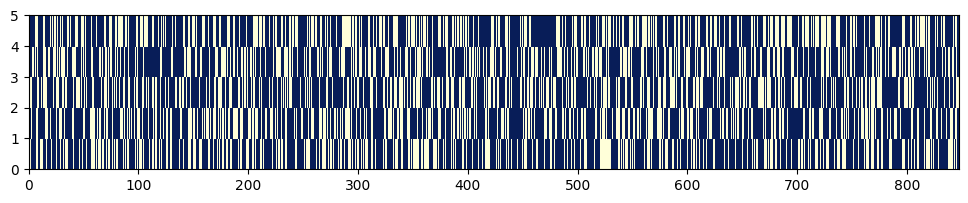

In [509]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [510]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 36.36%
Для модели № 2 размер OOB составляет 36.480000000000004%
Для модели № 3 размер OOB составляет 36.720000000000006%
Для модели № 4 размер OOB составляет 36.6%
Для модели № 5 размер OOB составляет 39.08%


In [511]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.9138134592680047, 0.08618654073199528)

In [512]:
bc1.oob_decision_function_[55:70]

array([[nan, nan, nan],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [nan, nan, nan],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### Визуализация результатов

In [513]:
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
!python -m pip install pydotplus
from pydotplus import graph_from_dot_data

from io import StringIO 

In [514]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [515]:
# Визуализация обученных решающих деревьев
for i in range(5):
    Image(get_png_tree(bc1.estimators_[i], x_train.columns), width='80%')

In [516]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [517]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [518]:
def plot_cl(clf):
    title = clf.__repr__
    clf.fit(x_train.iloc[:, 0:2], y_train)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = x_train.iloc[:, 0], x_train.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


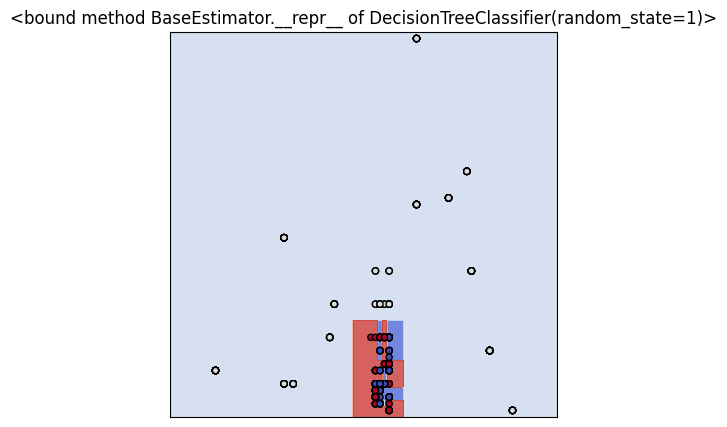

In [519]:
plot_cl(DecisionTreeClassifier(random_state=1))

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


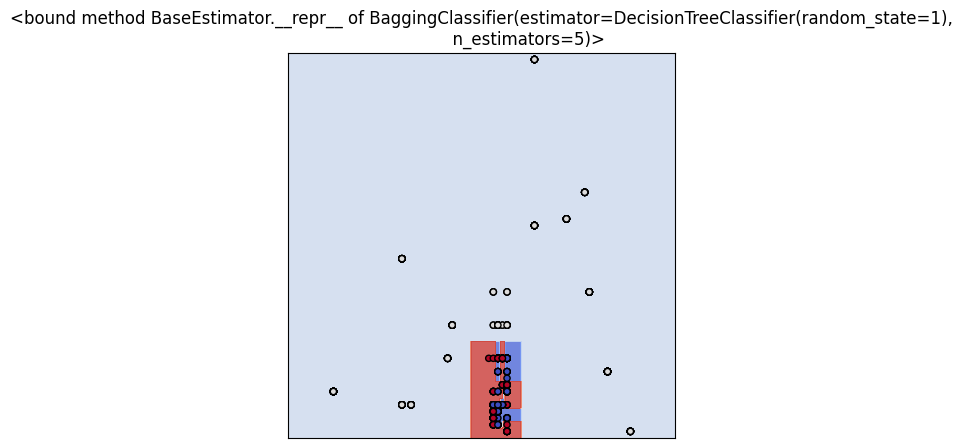

In [520]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=5))


d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


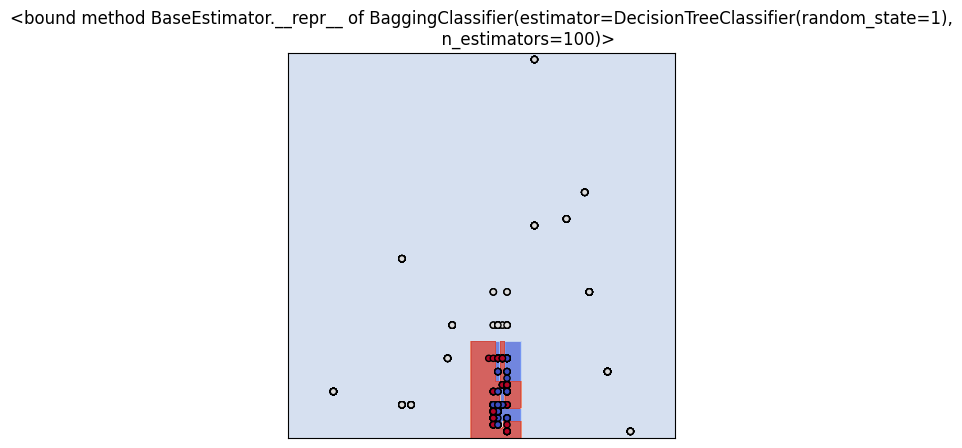

In [521]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))


### Оценка модели

In [522]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [523]:
kf = StratifiedKFold(n_splits=3)

In [524]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [525]:
target1_0 = bc1.predict(x_train)
target1_1 = bc1.predict(x_test)

In [526]:
print_accuracy_score_for_classes(y_train, target1_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [527]:
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [528]:
scores = cross_validate(BaggingClassifier(random_state=1), 
                        data.drop(["Grade_id", "Grade"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.02832031, 0.03004408, 0.02517557]),
 'score_time': array([0.01102018, 0.00914669, 0.00600052]),
 'test_precision': array([0.98877013, 1.        , 0.99446452]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.98866856, 1.        , 0.99433428]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.98868406, 1.        , 0.99434727]),
 'train_f1': array([1., 1., 1.])}

## Случайный лес

In [529]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(x_train, y_train)

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [530]:
tree1.oob_score_, 1-tree1.oob_score_

(0.9149940968122786, 0.08500590318772139)

### Визуализация

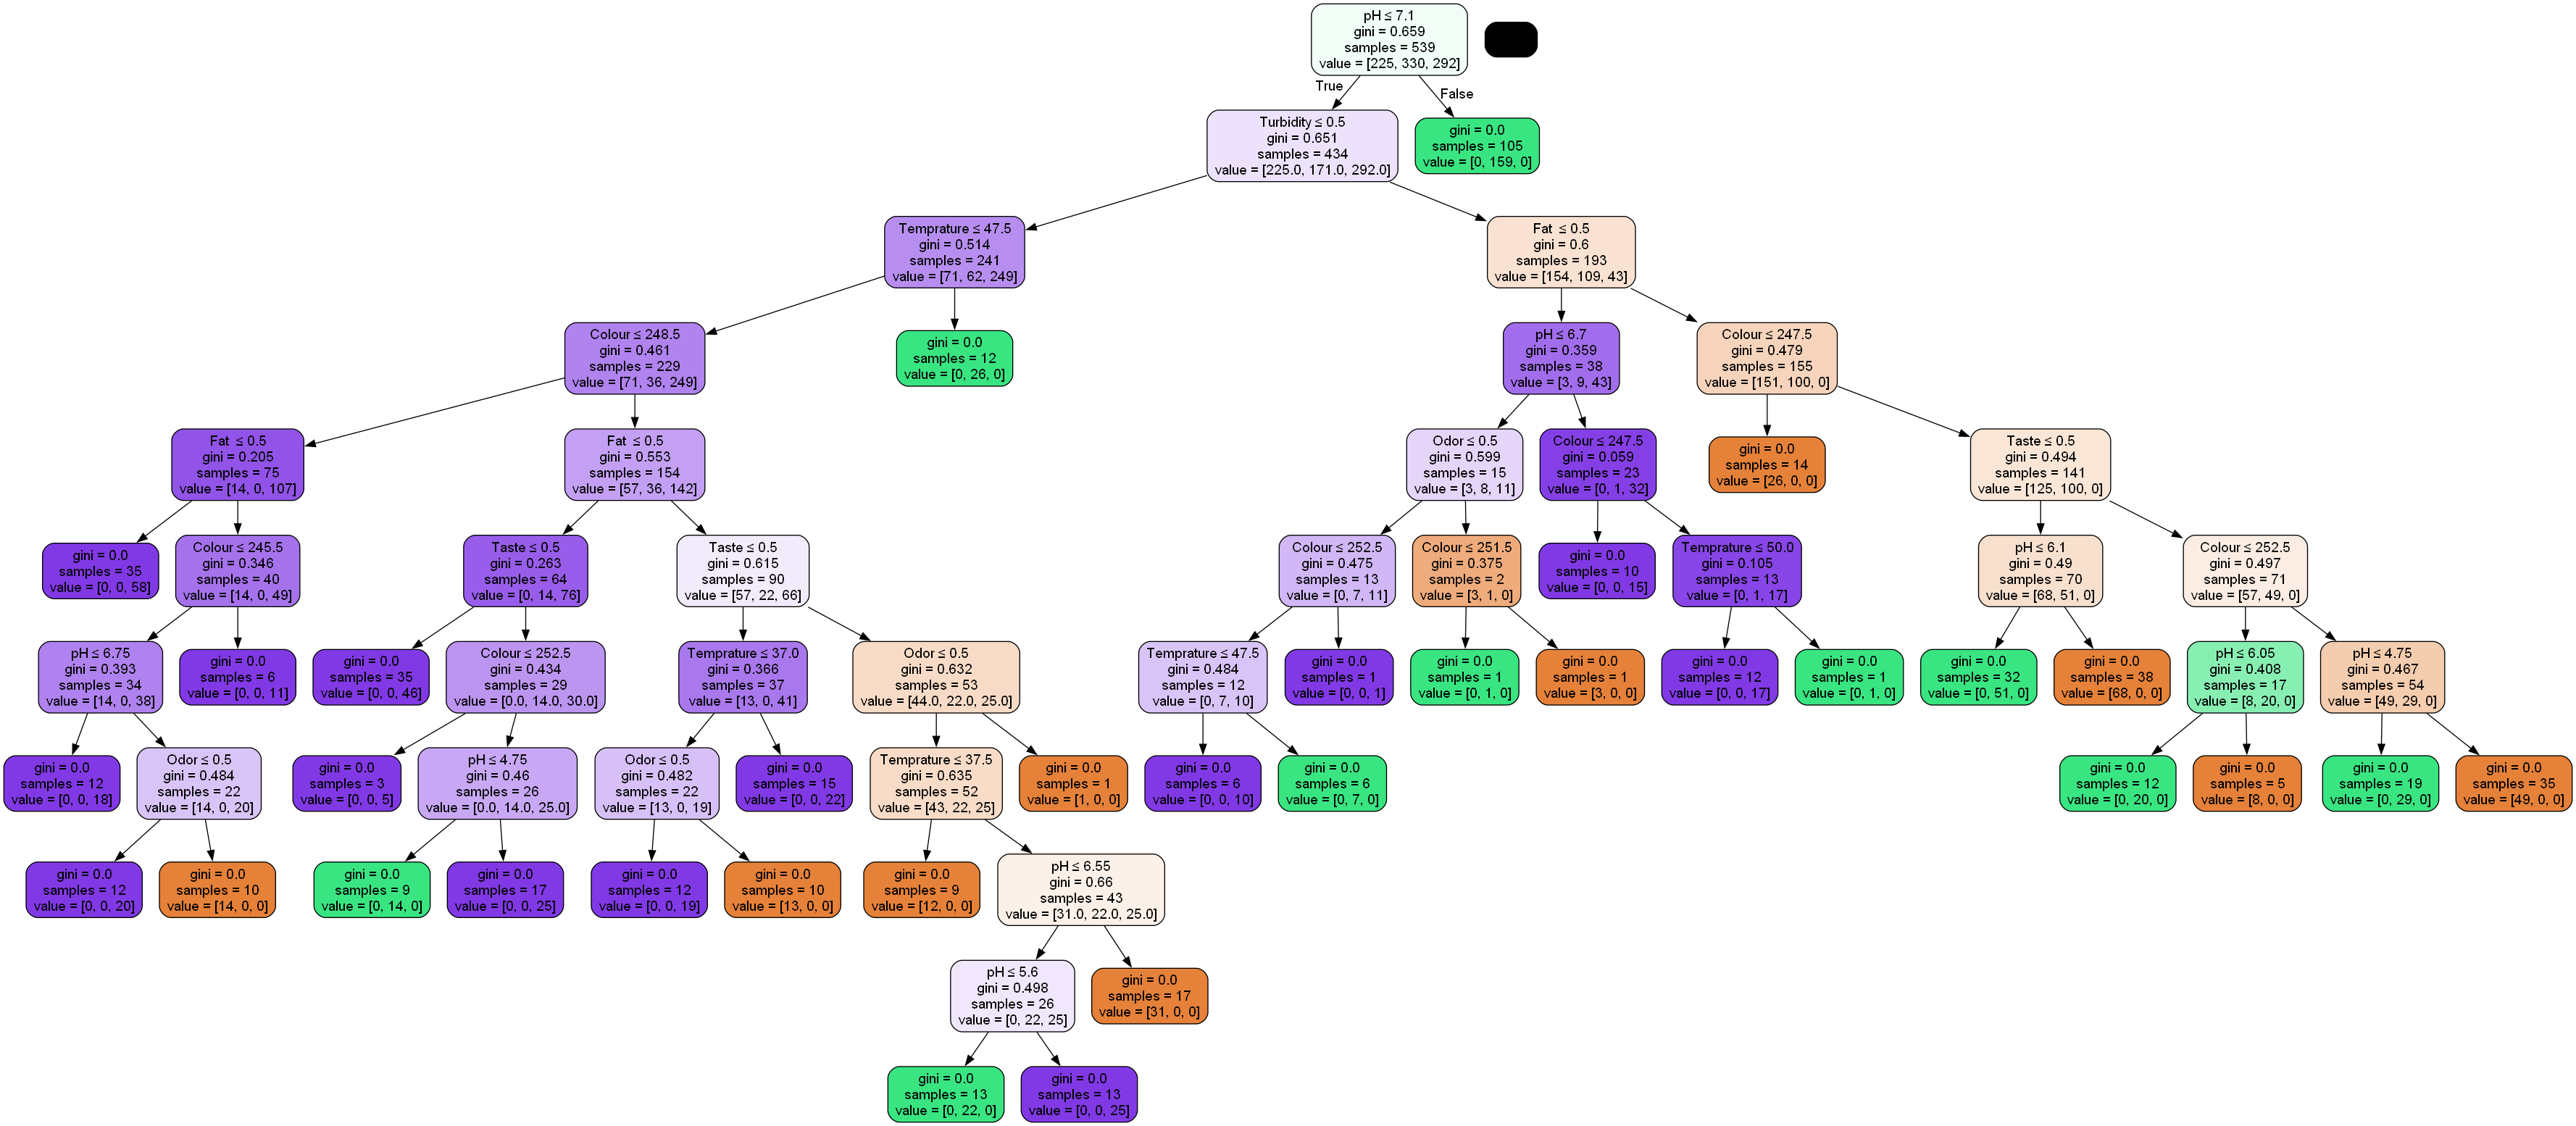

In [531]:
Image(get_png_tree(tree1.estimators_[0], x_train.columns), width="500")

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


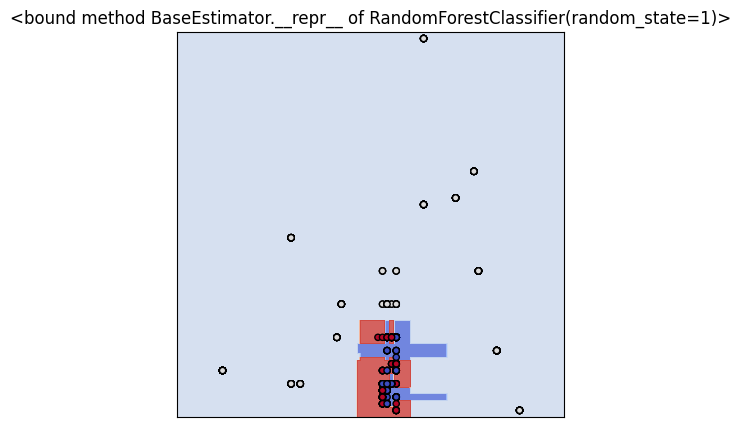

In [532]:
plot_cl(RandomForestClassifier(random_state=1))

In [533]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

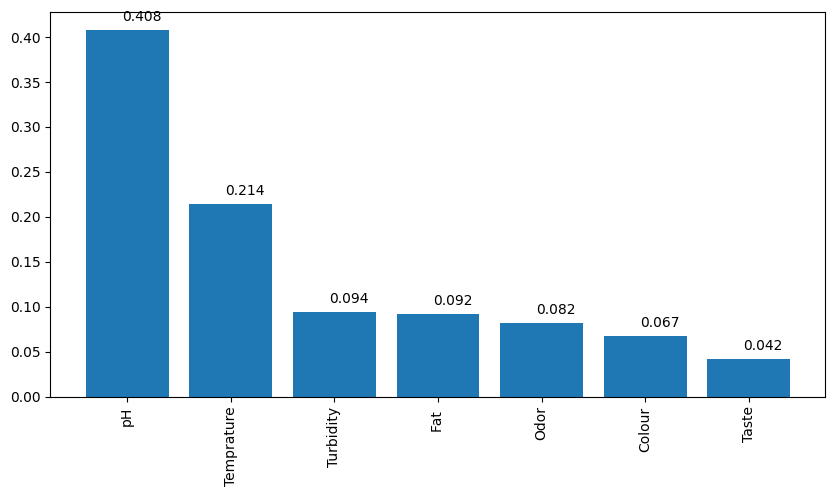

In [534]:
tree2 = RandomForestClassifier(random_state=1)
tree2.fit(x_train, y_train)
_,_ = draw_feature_importances(tree2, x_train)

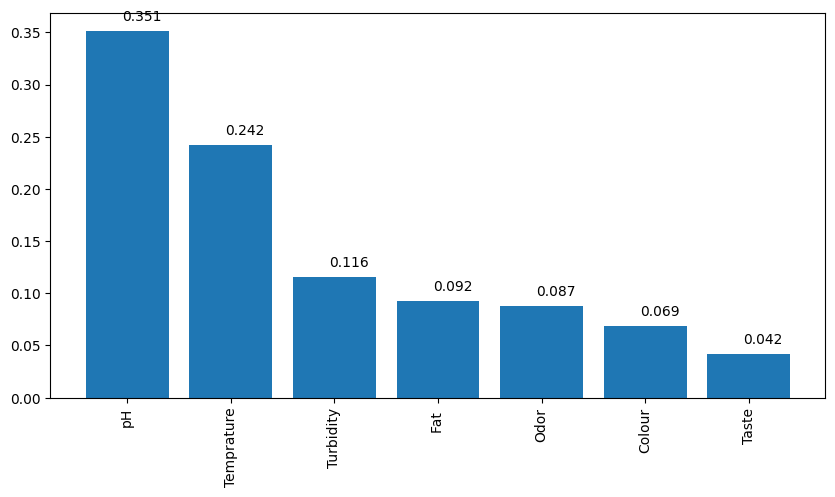

In [535]:
tree3 = ExtraTreesClassifier(random_state=1)
tree3.fit(x_train, y_train)
_,_ = draw_feature_importances(tree3, x_train)

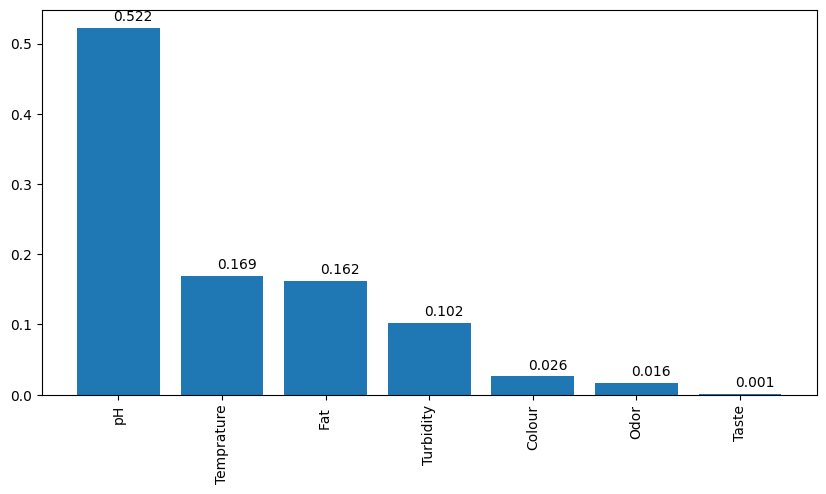

In [536]:
tree4 = DecisionTreeClassifier(random_state=1)
tree4.fit(x_train, y_train)
_,_ = draw_feature_importances(tree4, x_train)

### Оценка

- RandomForestClassifier(random_state=10)

In [537]:
target2_0 = tree1.predict(x_train)
target2_1 = tree1.predict(x_test)

In [538]:
print_accuracy_score_for_classes(y_train, target2_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [539]:
print_accuracy_score_for_classes(y_test, target2_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [540]:
scores = cross_validate(RandomForestClassifier(random_state=10), 
                        data.drop(["Grade", "Grade_id"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.15848184, 0.15663195, 0.14085507]),
 'score_time': array([0.01470947, 0.01086235, 0.01183152]),
 'test_precision': array([0.99442421, 1.        , 0.99446452]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.99433428, 1.        , 0.99433428]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.99434369, 1.        , 0.99434727]),
 'train_f1': array([1., 1., 1.])}

- RandomForestClassifier(random_state=1)

In [541]:
target3_0 = tree2.predict(x_train)
target3_1 = tree2.predict(x_test)

In [542]:
print_accuracy_score_for_classes(y_train, target3_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [543]:
print_accuracy_score_for_classes(y_test, target3_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [544]:
scores = cross_validate(RandomForestClassifier(random_state=1), 
                        data.drop(["Grade", "Grade_id"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.28495884, 0.14790535, 0.13092995]),
 'score_time': array([0.01588631, 0.01399469, 0.01000237]),
 'test_precision': array([0.99442421, 1.        , 0.99446452]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.99433428, 1.        , 0.99433428]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.99434369, 1.        , 0.99434727]),
 'train_f1': array([1., 1., 1.])}

- ExtraTreesClassifier

In [545]:
target4_0 = tree3.predict(x_train)
target4_1 = tree3.predict(x_test)

In [546]:
print_accuracy_score_for_classes(y_train, target4_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [547]:
print_accuracy_score_for_classes(y_test, target4_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [548]:
scores = cross_validate(ExtraTreesClassifier(random_state=1), 
                        data.drop(["Grade", "Grade_id"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.13784575, 0.1258924 , 0.13372588]),
 'score_time': array([0.01186752, 0.01517177, 0.01286244]),
 'test_precision': array([0.99442421, 1.        , 0.99446452]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.99433428, 1.        , 0.99433428]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.99434369, 1.        , 0.99434727]),
 'train_f1': array([1., 1., 1.])}

- DecisionTreeClassifier

In [549]:
target5_0 = tree3.predict(x_train)
target5_1 = tree3.predict(x_test)

In [550]:
print_accuracy_score_for_classes(y_train, target5_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [551]:
print_accuracy_score_for_classes(y_test, target5_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [552]:
scores = cross_validate(DecisionTreeClassifier(random_state=1), 
                        data.drop(["Grade", "Grade_id"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.00473499, 0.00275445, 0.00430083]),
 'score_time': array([0.01100612, 0.00889993, 0.00865436]),
 'test_precision': array([0.98877013, 1.        , 0.99158978]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.98866856, 1.        , 0.99150142]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.98868406, 1.        , 0.99151196]),
 'train_f1': array([1., 1., 1.])}

## AdaBoost

In [553]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

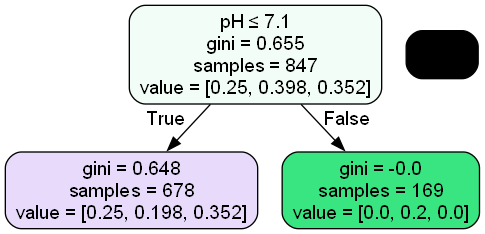

In [554]:
Image(get_png_tree(abc.estimators_[0], x_train.columns), width='40%')


In [555]:
abc.estimator_weights_


array([0.89930519, 1.11325384, 1.12567259, 0.89995057, 0.95401298])

In [556]:
df1 = abc.decision_function(x_train)
df1[:10]

array([[-0.22959273,  0.45937938, -0.22978665],
       [ 0.10490556, -0.5       ,  0.39509444],
       [-0.22959273,  0.45937938, -0.22978665],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444],
       [ 0.10490556, -0.5       ,  0.39509444]])

### Оценка

In [557]:
target6_0 = abc.predict(x_train)
target6_1 = abc.predict(x_test)

In [558]:
print_accuracy_score_for_classes(y_train, target6_0)

Метка 	 Accuracy
0 	 0.0
1 	 0.6943620178041543
2 	 1.0


In [559]:
print_accuracy_score_for_classes(y_test, target6_1)

Метка 	 Accuracy
0 	 0.0
1 	 0.6521739130434783
2 	 1.0


In [560]:
scores = cross_validate(AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10), 
                        data.drop(["Grade_id", "Grade"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'fit_time': array([0.01497483, 0.01222253, 0.01760221]),
 'score_time': array([0.01057363, 0.00981617, 0.01426864]),
 'test_precision': array([0.58003117, 0.5903019 , 0.56664461]),
 'train_precision': array([0.57666293, 0.58843968, 0.56833356]),
 'test_recall': array([0.52691218, 0.61756374, 0.57790368]),
 'train_recall': array([0.49575071, 0.63739377, 0.59065156]),
 'test_f1': array([0.47859094, 0.56247886, 0.51018577]),
 'train_f1': array([0.4410367 , 0.57565801, 0.52298597])}

## Градиентный бустинг

In [561]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=1)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

### Визуализация

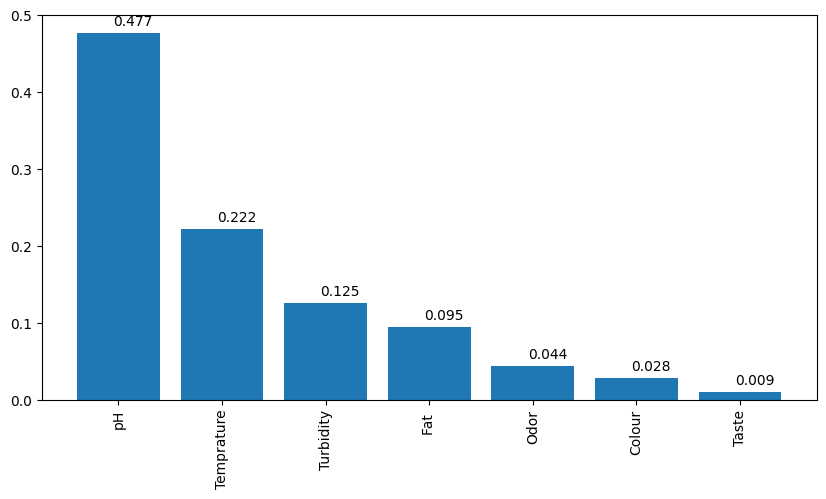

In [562]:
_,_ = draw_feature_importances(gbc, x_train)

d:\st\семестр 6\тмо\лр\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


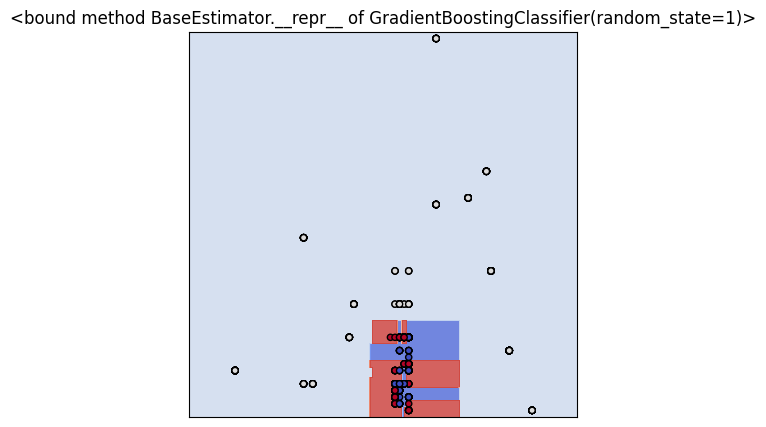

In [563]:
plot_cl(GradientBoostingClassifier(random_state=1))

### Оценка

In [564]:
target7_0 = gbc.predict(x_train)
target7_1 = gbc.predict(x_test)

In [565]:
print_accuracy_score_for_classes(y_train, target7_0)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [566]:
print_accuracy_score_for_classes(y_test, target7_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [567]:
scores = cross_validate(GradientBoostingClassifier(random_state=1), 
                        data.drop(["Grade_id", "Grade"], axis=1), data["Grade_id"], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.38171506, 0.3817842 , 0.36929941]),
 'score_time': array([0.01004601, 0.01000023, 0.01027369]),
 'test_precision': array([0.98877013, 1.        , 0.99446452]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.98866856, 1.        , 0.99433428]),
 'train_recall': array([1., 1., 1.]),
 'test_f1': array([0.98868406, 1.        , 0.99434727]),
 'train_f1': array([1., 1., 1.])}